In [67]:
import math 
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
g=9.81
rho=1.18
PAX=4
Range=200
Prop_Blade=4
Prop_Diam=2
L_D=11

#### Energy breakdown 
$$ E = E_{capacityFade}+E_{empty}+E_{cruize}+E_{hover}+E_{reserve} $$
#### Range cruize MKS | $[E_{cruize}] = [kj.kg^{-1}]$
$$ Range = E_{cruize}.\eta_{prop}.\frac{L}{D}.\frac{1}{g}.\frac{m_{bat}}{m_{tot}} $$
#### Mass breakdown MKS
$$ m_{tot} = m_{bat} +m_{empty} +m_{payload} $$
$$ m_{tot} = m_{bat} +k_{empty}.m_{tot} +m_{payload} $$
#### Solidity definition
$$\sigma = {\frac {A_{b}}{A_{d}}}={\frac {NcR}{\pi R^{2}}}={\frac {Nc}{\pi R}}$$
#### Momentum theory
#### Powerloading $[Disk Loading] = [kg.m^{-2}]$ | $[Power Loading] = [kg.kW^{-1}]$
$$ PL = FM.\sqrt{\frac{2.\rho}{DL}} =\frac{T}{P}$$ 
$$ DL=\frac{T}{A} $$

#### Rotor losses (induced power factor)
$$ k = k_{tiploss}+k_{inflowdistortion}+k_{swirl}+k_{other} $$
#### Coefficient of Power
$$ C_{P} =  C_{Pi}+C_{P0}=\frac{k.C_{T}^{3/2}}{\sqrt{2}}+\frac{\sigma.C_{d0}}{8}$$
#### Figure of merit 
$$ FM=\frac{Ideal Power}{Induced Power + Profile Power}= \frac{\frac{C_{T}^{3/2}}{\sqrt{2}}}{\frac{k.C_{T}^{3/2}}{\sqrt{2}}+\frac{\sigma.C_{d0}}{8}}$$

In [69]:
def eRange(E,L_D,mbat,mtot):
    eta=0.9
    Range=E*eta*1/g*L_D*mbat/mtot
    return Range
def PowerLoading(FM,DL):
    PL=FM*math.sqrt(2*rho/DL)
    return PL
def mtot(kempty,mbat,mpay):
        mtot=(mbat+mpay)/(1-kempty)
        return mtot
def FOM(Ct,k,sigma,Cd0):
    FOM=((Ct**(3/2))/math.sqrt(2))/((k*(Ct**(3/2))/math.sqrt(2))+(sigma*Cd0/8))
    return FOM
def Cp(Ct,k,sigma,Cd0):
    Cp=(k*(Ct**(3/2))/math.sqrt(2))+(sigma*Cd0/8)
    return Cp

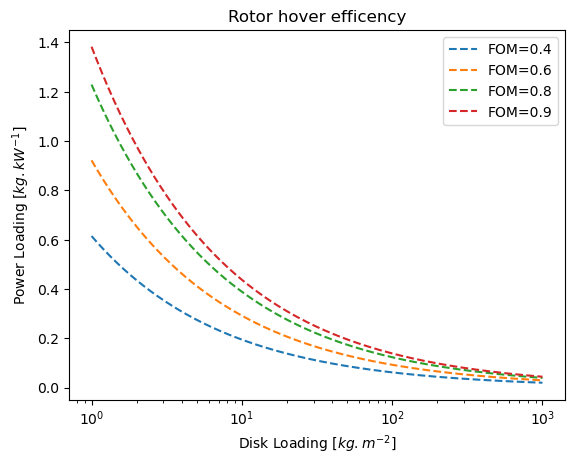

In [70]:
x0=np.linspace(1,1000,1000000)
func=np.vectorize(PowerLoading)
y0=func(0.4,x0)
y1=func(0.6,x0)
y2=func(0.8,x0)
y3=func(0.9,x0)

f0 = interp1d(x0, y0, kind='quadratic')
f1 = interp1d(x0, y1, kind='quadratic')
f2 = interp1d(x0, y2, kind='quadratic')
f3 = interp1d(x0, y3, kind='quadratic')

plt.plot(x0 , f0(x0), '--', x0 , f1(x0) , '--', x0, f2(x0), '--', x0, f3(x0), '--')
plt.legend(['FOM=0.4','FOM=0.6','FOM=0.8','FOM=0.9'], loc='best')
plt.xlabel(r'Disk Loading [$kg.m^{-2}$]')
plt.ylabel(r'Power Loading [$kg.kW^{-1}$]')
plt.xscale("log")
plt.title('Rotor hover efficency')
plt.show()

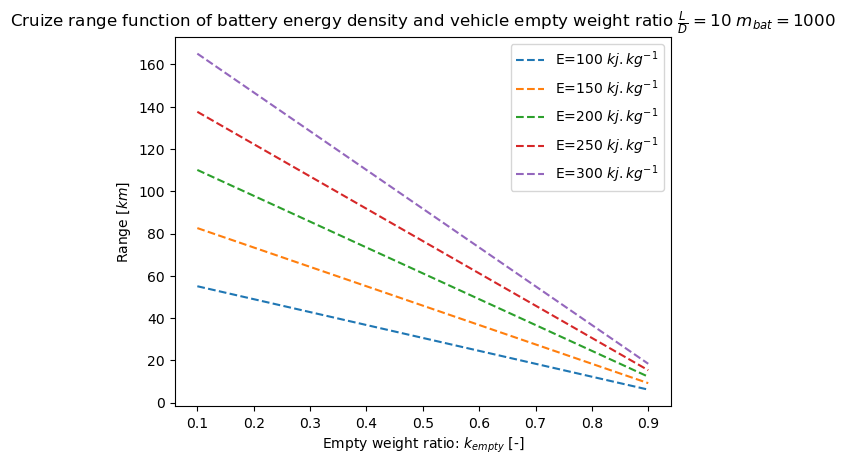

In [71]:
x0=np.linspace(0.1,0.9,9)

vect_mtot=np.vectorize(mtot)
vect_eRange=np.vectorize(eRange)
y0=vect_eRange(100,10,1000,vect_mtot(x0,1000,500))
y1=vect_eRange(150,10,1000,vect_mtot(x0,1000,500))
y2=vect_eRange(200,10,1000,vect_mtot(x0,1000,500))
y3=vect_eRange(250,10,1000,vect_mtot(x0,1000,500))
y4=vect_eRange(300,10,1000,vect_mtot(x0,1000,500))

f0 = interp1d(x0, y0, kind='quadratic')
f1 = interp1d(x0, y1, kind='quadratic')
f2 = interp1d(x0, y2, kind='quadratic')
f3 = interp1d(x0, y3, kind='quadratic')
f4 = interp1d(x0, y4, kind='quadratic')

plt.plot(x0 , f0(x0), '--', x0 , f1(x0) , '--', x0, f2(x0), '--', x0, f3(x0), '--', x0, f4(x0), '--')
plt.legend([r'E=100 $kj.kg^{-1}$',r'E=150 $kj.kg^{-1}$',r'E=200 $kj.kg^{-1}$',r'E=250 $kj.kg^{-1}$',r'E=300 $kj.kg^{-1}$'], loc='best')
plt.xlabel(r'Empty weight ratio: $k_{empty}$ [-]')
plt.ylabel(r'Range [$km$]')
plt.title(r'Cruize range function of battery energy density and vehicle empty weight ratio $\frac{L}{D}=10$ $m_{bat}=1000$')
plt.show()

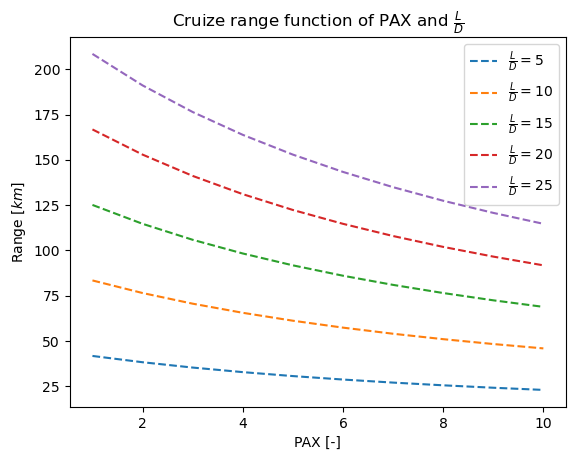

In [72]:
x0=np.linspace(1,10,10)

vect_mtot=np.vectorize(mtot)
vect_eRange=np.vectorize(eRange)
y0=vect_eRange(200,5,1000,vect_mtot(0.5,1000,x0*100))
y1=vect_eRange(200,10,1000,vect_mtot(0.5,1000,x0*100))
y2=vect_eRange(200,15,1000,vect_mtot(0.5,1000,x0*100))
y3=vect_eRange(200,20,1000,vect_mtot(0.5,1000,x0*100))
y4=vect_eRange(200,25,1000,vect_mtot(0.5,1000,x0*100))

f0 = interp1d(x0, y0, kind='quadratic')
f1 = interp1d(x0, y1, kind='quadratic')
f2 = interp1d(x0, y2, kind='quadratic')
f3 = interp1d(x0, y3, kind='quadratic')
f4 = interp1d(x0, y4, kind='quadratic')

plt.plot(x0 , f0(x0), '--', x0 , f1(x0) , '--', x0, f2(x0), '--', x0, f3(x0), '--', x0, f4(x0), '--')
plt.legend([r'$\frac{L}{D}=5$',r'$\frac{L}{D}=10$',r'$\frac{L}{D}=15$',r'$\frac{L}{D}=20$',r'$\frac{L}{D}=25$'], loc='best')
plt.xlabel(r'PAX [-]')
plt.ylabel(r'Range [$km$]')
plt.title(r'Cruize range function of PAX and $\frac{L}{D}$')
plt.show()

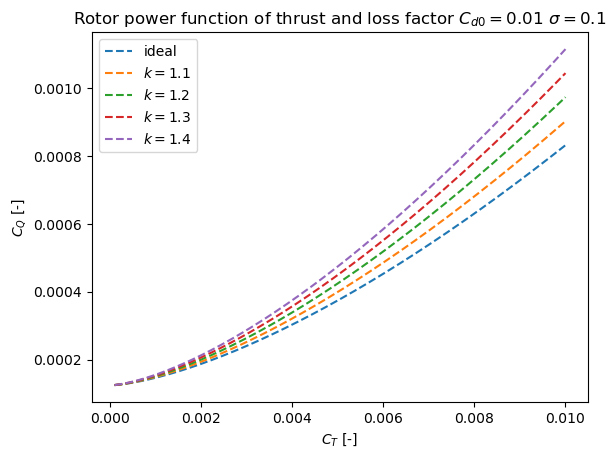

In [73]:
x0=np.linspace(0.0001,0.01,1000)

vect_Cp=np.vectorize(Cp)

y0=vect_Cp(x0,1.0,0.1,0.01)
y1=vect_Cp(x0,1.1,0.1,0.01)
y2=vect_Cp(x0,1.2,0.1,0.01)
y3=vect_Cp(x0,1.3,0.1,0.01)
y4=vect_Cp(x0,1.4,0.1,0.01)

f0 = interp1d(x0, y0, kind='quadratic')
f1 = interp1d(x0, y1, kind='quadratic')
f2 = interp1d(x0, y2, kind='quadratic')
f3 = interp1d(x0, y3, kind='quadratic')
f4 = interp1d(x0, y4, kind='quadratic')

plt.plot(x0 , f0(x0), '--', x0 , f1(x0) , '--', x0, f2(x0), '--', x0, f3(x0), '--', x0, f4(x0), '--')
plt.legend([r'ideal',r'$k=1.1$',r'$k=1.2$',r'$k=1.3$',r'$k=1.4$'], loc='best')
plt.xlabel(r'$C_{T}$ [-]')
plt.ylabel(r'$C_{Q}$ [-]')
plt.title(r'Rotor power function of thrust and loss factor $C_{d0}=0.01$ $\sigma=0.1$')
plt.show()

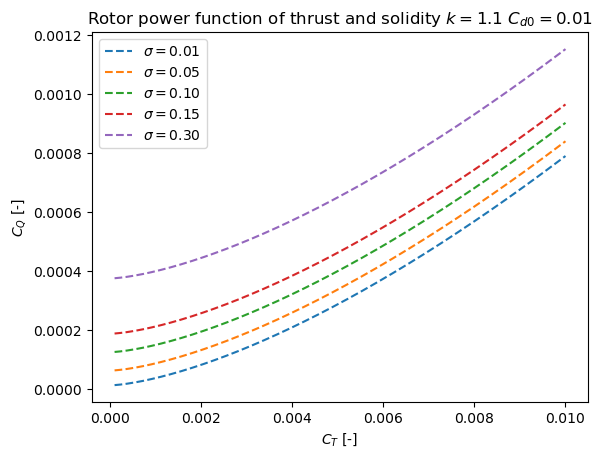

In [74]:
x0=np.linspace(0.0001,0.01,1000)

vect_Cp=np.vectorize(Cp)

y0=vect_Cp(x0,1.1,0.01,0.01)
y1=vect_Cp(x0,1.1,0.05,0.01)
y2=vect_Cp(x0,1.1,0.10,0.01)
y3=vect_Cp(x0,1.1,0.15,0.01)
y4=vect_Cp(x0,1.1,0.30,0.01)

f0 = interp1d(x0, y0, kind='quadratic')
f1 = interp1d(x0, y1, kind='quadratic')
f2 = interp1d(x0, y2, kind='quadratic')
f3 = interp1d(x0, y3, kind='quadratic')
f4 = interp1d(x0, y4, kind='quadratic')

plt.plot(x0 , f0(x0), '--', x0 , f1(x0) , '--', x0, f2(x0), '--', x0, f3(x0), '--', x0, f4(x0), '--')
plt.legend([r'$\sigma=0.01$',r'$\sigma=0.05$',r'$\sigma=0.10$',r'$\sigma=0.15$',r'$\sigma=0.30$'], loc='best')
plt.xlabel(r'$C_{T}$ [-]')
plt.ylabel(r'$C_{Q}$ [-]')
plt.title(r'Rotor power function of thrust and solidity $k=1.1$ $C_{d0}=0.01$')
plt.show()

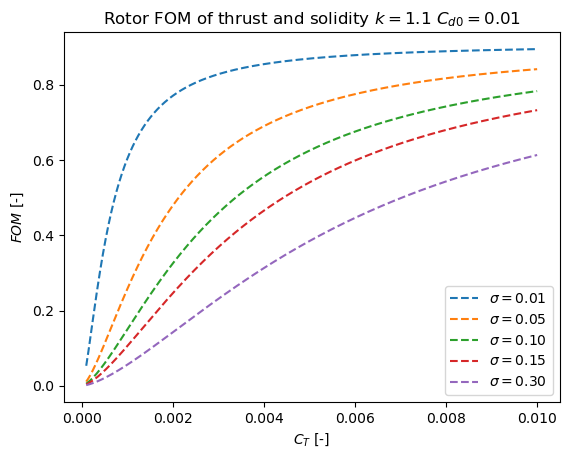

In [75]:
x0=np.linspace(0.0001,0.01,1000)

vect_FOM=np.vectorize(FOM)

y0=vect_FOM(x0,1.1,0.01,0.01)
y1=vect_FOM(x0,1.1,0.05,0.01)
y2=vect_FOM(x0,1.1,0.10,0.01)
y3=vect_FOM(x0,1.1,0.15,0.01)
y4=vect_FOM(x0,1.1,0.30,0.01)

f0 = interp1d(x0, y0, kind='quadratic')
f1 = interp1d(x0, y1, kind='quadratic')
f2 = interp1d(x0, y2, kind='quadratic')
f3 = interp1d(x0, y3, kind='quadratic')
f4 = interp1d(x0, y4, kind='quadratic')

plt.plot(x0 , f0(x0), '--', x0 , f1(x0) , '--', x0, f2(x0), '--', x0, f3(x0), '--', x0, f4(x0), '--')
plt.legend([r'$\sigma=0.01$',r'$\sigma=0.05$',r'$\sigma=0.10$',r'$\sigma=0.15$',r'$\sigma=0.30$'], loc='best')
plt.xlabel(r'$C_{T}$ [-]')
plt.ylabel(r'$FOM$ [-]')
plt.title(r'Rotor FOM of thrust and solidity $k=1.1$ $C_{d0}=0.01$')
plt.show()

In [76]:
#Archer
Energy={'Fade':28,'Hover':26,'Cruize':80,'Reserve':37,'Empty':16}
Energy_df=pd.DataFrame(Energy,index=['Archer'])

In [77]:
Energy_df

,Fade,Hover,Cruize,Reserve,Empty
Archer,28,26,80,37,16


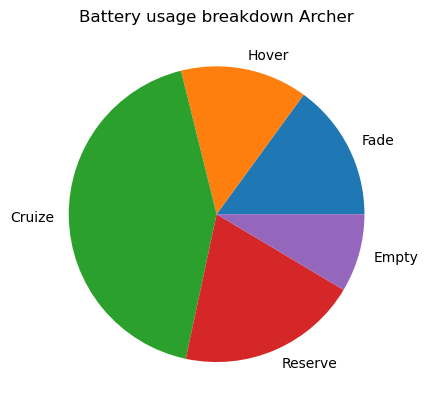

In [78]:
plt.pie(Energy_df.loc['Archer'].values,labels=np.array(Energy_df.columns))
plt.title('Battery usage breakdown Archer')
plt.show()

####  Lift-to-drag ratio
$$ (L/D)_{\max }={\frac {1}{2}}{\sqrt {\frac {\pi \varepsilon AR}{C_{D,0}}}} $$

AR aspect ratio, $$ \varepsilon $$  span efficiency factor ~<1
$$ C_{D,0} $$ zero-lift drag coefficient.

independent of the weight of the aircraft, the area of the wing, or the wing loading.

main drivers of maximum lift-to-drag : wingspan and total wetted area. 
well designed aircraft, zero-lift drag (or parasite drag) is mostly made up of skin friction drag plus a small percentage of pressure drag caused by flow separation. The method uses the equation:

$$ C_{D,0}=C_{\text{fe}}{\frac {S_{\text{wet}}}{S_{\text{ref}}}} $$
where $$ C_{\text{fe}} $$ is the equivalent skin friction coefficient, $$ S_{\text{wet}} $$ is the wetted area and $$ S_{\text{ref}}$$ is the wing reference area. equivalent skin friction coefficient accounts for both separation drag and skin friction drag and is a fairly consistent value for aircraft types of the same class. Substituting this into the equation for maximum lift-to-drag ratio, along with the equation for aspect ratio ($$ b^{2}/S_{\text{ref}} $$, yields the equation:

$$ (L/D)_{\max }={\frac {1}{2}}{\sqrt {{\frac {\pi \varepsilon }{C_{\text{fe}}}}{\frac {b^{2}}{S_{\text{wet}}}}}} $$
where b is wingspan. The term $$ b^{2}/S_{wet} $$ is known as the wetted aspect ratio. The equation demonstrates the importance of wetted aspect ratio in achieving an aerodynamically efficient design.

In [79]:
def L_over_D(b,Cfe,epsilon,Swet):
    L_D=1/2*math.sqrt(math.pi*epsilon/Cfe/Swet*b**2)
    return L_D


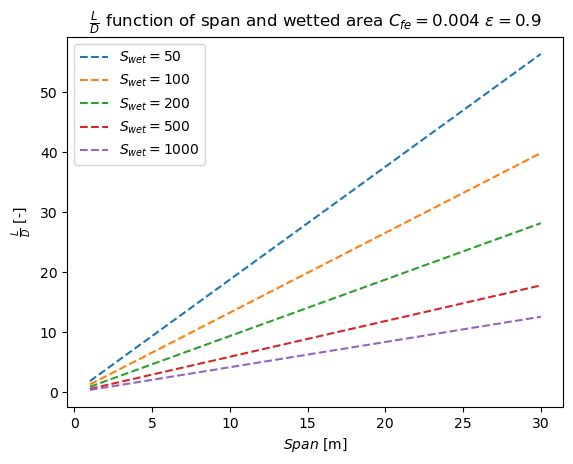

In [80]:
x0=np.linspace(1,30,30)

vect_L_over_D=np.vectorize(L_over_D)

y0=vect_L_over_D(x0,0.004,0.9,50)
y1=vect_L_over_D(x0,0.004,0.9,100)
y2=vect_L_over_D(x0,0.004,0.9,200)
y3=vect_L_over_D(x0,0.004,0.9,500)
y4=vect_L_over_D(x0,0.004,0.9,1000)

f0 = interp1d(x0, y0, kind='quadratic')
f1 = interp1d(x0, y1, kind='quadratic')
f2 = interp1d(x0, y2, kind='quadratic')
f3 = interp1d(x0, y3, kind='quadratic')
f4 = interp1d(x0, y4, kind='quadratic')

plt.plot(x0 , f0(x0), '--', x0 , f1(x0) , '--', x0, f2(x0), '--', x0, f3(x0), '--', x0, f4(x0), '--')
plt.legend([r'$S_{wet}=50$',r'$S_{wet}=100$',r'$S_{wet}=200$',r'$S_{wet}=500$',r'$S_{wet}=1000$'], loc='best')
plt.xlabel(r'$Span$ [m]')
plt.ylabel(r'$\frac{L}{D}$ [-]')
plt.title(r'$\frac{L}{D}$ function of span and wetted area $ C_{fe}=0.004 $ $ \epsilon =0.9 $')
plt.show()

### Climb energy consumption

#### Energy consumption hover and climb
$$ P_{v} = \frac{{(m_{tot}.g)}^{3/2}}{\sqrt{2.\rho.S_{d}}.FOM} $$ 
$$ E_{vertical} = m_{tot}.g.h_{v} + t_{v}.P_{v} $$ 

In [81]:
def Pv(mtot,FOM,S):
    Pv=((mtot*g)**(3/2))/(math.sqrt(2*rho*S)*FOM)
    return Pv
def Ev(mtot,hv,tv,Pv):
    Ev=mtot*g*hv+tv*Pv
    return Ev


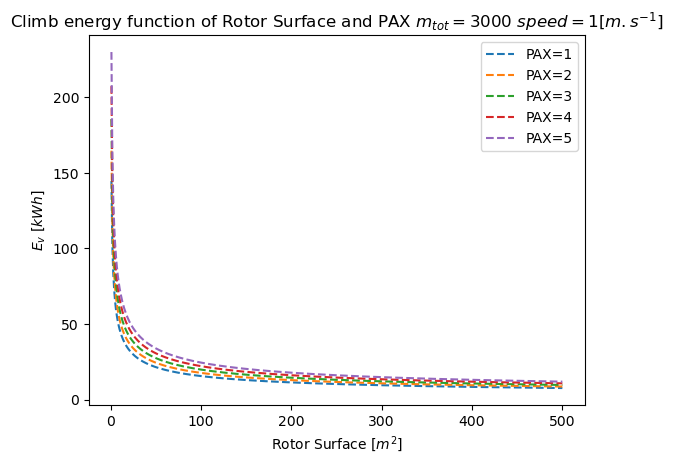

In [82]:
#climb at 1m/s up to 100m
#mtot and S
x0=np.linspace(1,500,500)

vect_Pv=np.vectorize(Pv)
vect_Ev=np.vectorize(Ev)

y0=vect_Ev(mtot(0.5,1000,100),200,200,vect_Pv(mtot(0.5,1000,100),0.8,x0))/3600/1000
y1=vect_Ev(mtot(0.5,1000,200),200,200,vect_Pv(mtot(0.5,1000,200),0.8,x0))/3600/1000
y2=vect_Ev(mtot(0.5,1000,300),200,200,vect_Pv(mtot(0.5,1000,300),0.8,x0))/3600/1000
y3=vect_Ev(mtot(0.5,1000,400),200,200,vect_Pv(mtot(0.5,1000,400),0.8,x0))/3600/1000
y4=vect_Ev(mtot(0.5,1000,500),200,200,vect_Pv(mtot(0.5,1000,500),0.8,x0))/3600/1000

f0 = interp1d(x0, y0, kind='quadratic')
f1 = interp1d(x0, y1, kind='quadratic')
f2 = interp1d(x0, y2, kind='quadratic')
f3 = interp1d(x0, y3, kind='quadratic')
f4 = interp1d(x0, y4, kind='quadratic')

plt.plot(x0 , f0(x0), '--', x0 , f1(x0) , '--', x0, f2(x0), '--', x0, f3(x0), '--', x0, f4(x0), '--')
plt.legend(['PAX=1','PAX=2','PAX=3','PAX=4','PAX=5'], loc='best')
plt.xlabel(r'Rotor Surface [$m^{2}$]')
plt.ylabel(r'$E_{v}$ $[kWh]$')
plt.title(r'Climb energy function of Rotor Surface and PAX $ m_{tot}=3000 $ $ speed =1 [m.s^{-1}] $')
plt.show()

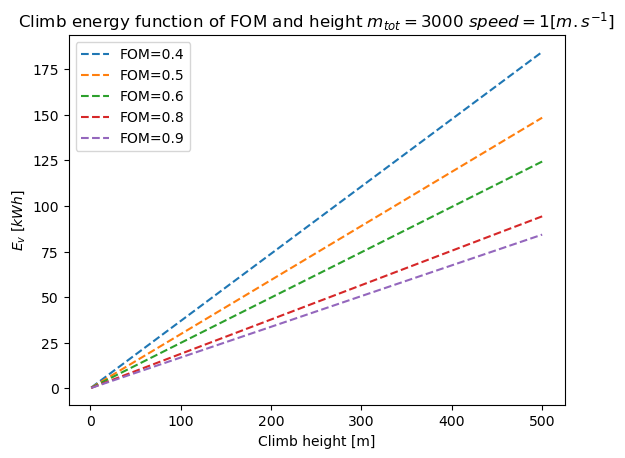

In [83]:
#climb at 1m/s up to 100m
x0=np.linspace(1,500,500)

vect_Ev=np.vectorize(Ev)

y0=vect_Ev(3000,x0,x0,Pv(3000,0.4,40))/3600/1000
y1=vect_Ev(3000,x0,x0,Pv(3000,0.5,40))/3600/1000
y2=vect_Ev(3000,x0,x0,Pv(3000,0.6,40))/3600/1000
y3=vect_Ev(3000,x0,x0,Pv(3000,0.8,40))/3600/1000
y4=vect_Ev(3000,x0,x0,Pv(3000,0.9,40))/3600/1000

f0 = interp1d(x0, y0, kind='quadratic')
f1 = interp1d(x0, y1, kind='quadratic')
f2 = interp1d(x0, y2, kind='quadratic')
f3 = interp1d(x0, y3, kind='quadratic')
f4 = interp1d(x0, y4, kind='quadratic')

plt.plot(x0 , f0(x0), '--', x0 , f1(x0) , '--', x0, f2(x0), '--', x0, f3(x0), '--', x0, f4(x0), '--')
plt.legend(['FOM=0.4','FOM=0.5','FOM=0.6','FOM=0.8','FOM=0.9'], loc='best')
plt.xlabel(r'Climb height [m]')
plt.ylabel(r'$E_{v}$ $[kWh]$')
plt.title(r'Climb energy function of FOM and height $ m_{tot}=3000 $ $ speed =1 [m.s^{-1}] $')
plt.show()

### Gutin noise


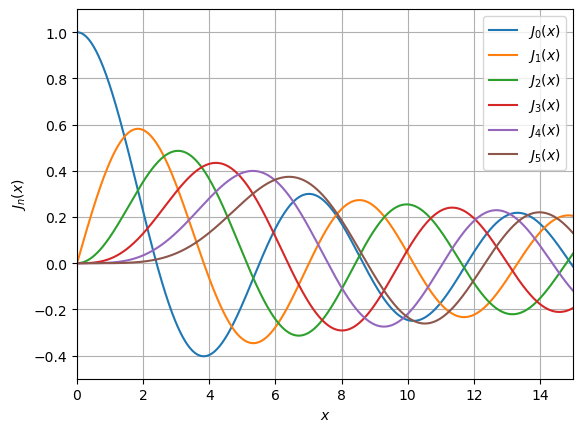

In [84]:
#first six Bessel functions
import scipy.special as sp 

x = np.linspace(0,15,5000)

for v in range(0,6):
    plt.plot(x,sp.jv(v,x))
    
plt.xlim((0,15)) 
plt.ylim((-0.5,1.1)) 
plt.legend(('${J}_0(x)$','${J}_1(x)$','${J}_2(x)$', '${J}_3(x)$','${J}_4(x)$','${J}_5(x)$'),loc=0) 
plt.xlabel('$x$') 
plt.ylabel('${J}_n(x)$') 
plt.grid(True) 

In [85]:
def GutinHarmonic(B,r,Mt,d,T,theta,Ph):
    GH=[]
    for m in (0,11):
        x=0.8*Mt*m*B*math.sin(math.radians(theta))
        Harmonic =(169.3*m*B*r*Mt)/(d*math.pi*r**2)*(0.76*Ph/Mt**2 -T*math.cos(math.radians(theta)))*sp.jv(m*B,x)
        GH.append([x,Harmonic])
    return GH

#def GHdBA(GH,etha):
    
    

In [86]:
a=GutinHarmonic(2,1,0.6,100,1000,110,1000)

In [87]:
a

[[0.0, 0.0], [9.923154075499191, 0.010443119640810732]]